In [50]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox# for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from scipy.spatial import Delaunay, delaunay_plot_2d, Voronoi, voronoi_plot_2d
import numpy as np
from shapely.geometry import *

In [89]:
centroids = gpd.read_file('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/dataframes/district_centroids.geojson') # districts centroids data 
clean_pois = gpd.read_file('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/dataframes/clean_pois_montreal.geojson') # pois data
polygons = gpd.read_file('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/dataframes/district_polygons.geojson') # districts polygons data
polygons_2 = gpd.read_file('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/dataframes/quartiers_sociologiques_2014.geojson') # polygons data - seems more complete! CHECK
city = 'Montreal, Canada'

In [107]:
centroids.head()

,no_arr,nom_qr,nom_arr,nom_mun,geometry
0,05,Outremont,Outremont,Montréal,POINT (-73.60865 45.51564)
1,09,Anjou,Anjou,Montréal,POINT (-73.56538 45.61250)
2,12,Desmarchais-Crawford,Verdun,Montréal,POINT (-73.58163 45.44554)
3,14,Grande-Prairie,Saint-Léonard,Montréal,POINT (-73.58926 45.59524)
4,15,Chameran/Montpellier,Saint-Laurent,Montréal,POINT (-73.67361 45.52347)


In [106]:
polygons.head()

,no_arr,nom_qr,nom_arr,nom_mun,geometry
0,05,Outremont,Outremont,Montréal,"MULTIPOLYGON (((-73.59061 45.51534, -73.59078 ..."
1,09,Anjou,Anjou,Montréal,"MULTIPOLYGON (((-73.53672 45.60269, -73.53660 ..."
2,12,Desmarchais-Crawford,Verdun,Montréal,"MULTIPOLYGON (((-73.57667 45.45468, -73.57645 ..."
3,14,Grande-Prairie,Saint-Léonard,Montréal,"MULTIPOLYGON (((-73.56601 45.58285, -73.56604 ..."
4,15,Chameran/Montpellier,Saint-Laurent,Montréal,"MULTIPOLYGON (((-73.66675 45.52802, -73.66859 ..."


In [104]:
polygons_2.head()

,id,Q_sociologique,Arrondissement,Abreviation,nbr_RUI,Table,geometry
0,1,Ahuntsic,Ahuntsic-Cartierville,AHU,0,Solidarité Ahuntsic,"MULTIPOLYGON (((-73.69831 45.54688, -73.69813 ..."
1,2,Bordeaux-Cartierville,Ahuntsic-Cartierville,AHU,1,Conseil local des intervenants communautaires ...,"MULTIPOLYGON (((-73.69831 45.54688, -73.69827 ..."
2,3,Anjou,Anjou,AJ,0,Regroupement des organismes communautaires et ...,"MULTIPOLYGON (((-73.60235 45.61259, -73.60142 ..."
3,4,Côte-des-Neiges,Côte-des-Neiges–Notre-Dame-de-Grâce,CDN,0,Corporation de développement communautaire de ...,"MULTIPOLYGON (((-73.67721 45.48369, -73.67628 ..."
4,5,Notre-Dame-de-Grâce,Côte-des-Neiges–Notre-Dame-de-Grâce,CND,0,Conseil communautaire de Notre-Dame-de-Grâce,"MULTIPOLYGON (((-73.62992 45.47836, -73.62950 ..."


In [105]:
clean_pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923)


# Selecting only POIs that are Points (maybe try to retrieve centroids for polygons)

In [77]:
clean_pois_nodes = clean_pois[clean_pois.geometry.geom_type == 'Point']

# Checking crs of POIs and district dataframes

In [103]:
clean_pois.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [80]:
polygons.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [101]:
polygons_2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
centroids.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Displaying POIs per polygon

In [99]:
def plot_pois(pois_gdf, districts_gdf, amenity):
    amenity_gdf = pois_gdf[pois_gdf['category'] == amenity]
    fig, ax = plt.subplots(figsize=(7, 7))
    districts_gdf.plot(ax=ax, color='lightblue', edgecolor='black')
    amenity_gdf.plot(ax=ax, color='red', marker='o', markersize=20, alpha=0.3)
    plt.title(f'{amenity}s within Montreal Neighbourhoods')
    plt.show()

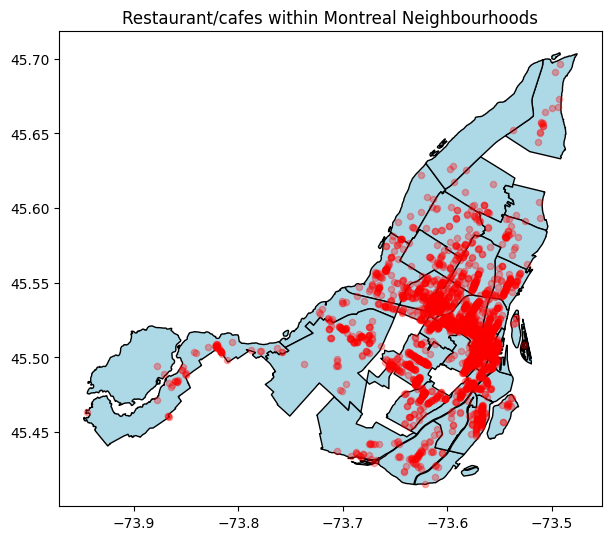

In [100]:
plot_pois(clean_pois, polygons_2, 'Restaurant/cafe')

# Extra

In [25]:
def extract_coordinates(gdf):
    coords = np.vstack((
        np.array(gdf.geometry.x),
        np.array(gdf.geometry.y))).T
    return coords

In [26]:
pharmacies_coords = extract_coordinates(pharmacies)
restaurants_coords = extract_coordinates(restaurants)
cafes_coords = extract_coordinates(cafes)

In [14]:
drive_graph = ox.graph_from_place(city, network_type='drive')
G_proj = ox.project_graph(drive_graph)
# get the street network for a place, and its area in square meters - TODO: try to get per neighbourhood
city = ox.geocode_to_gdf('Montreal, Canada')
city_proj = ox.project_gdf(city)
area = city_proj.unary_union.area

KeyboardInterrupt: 

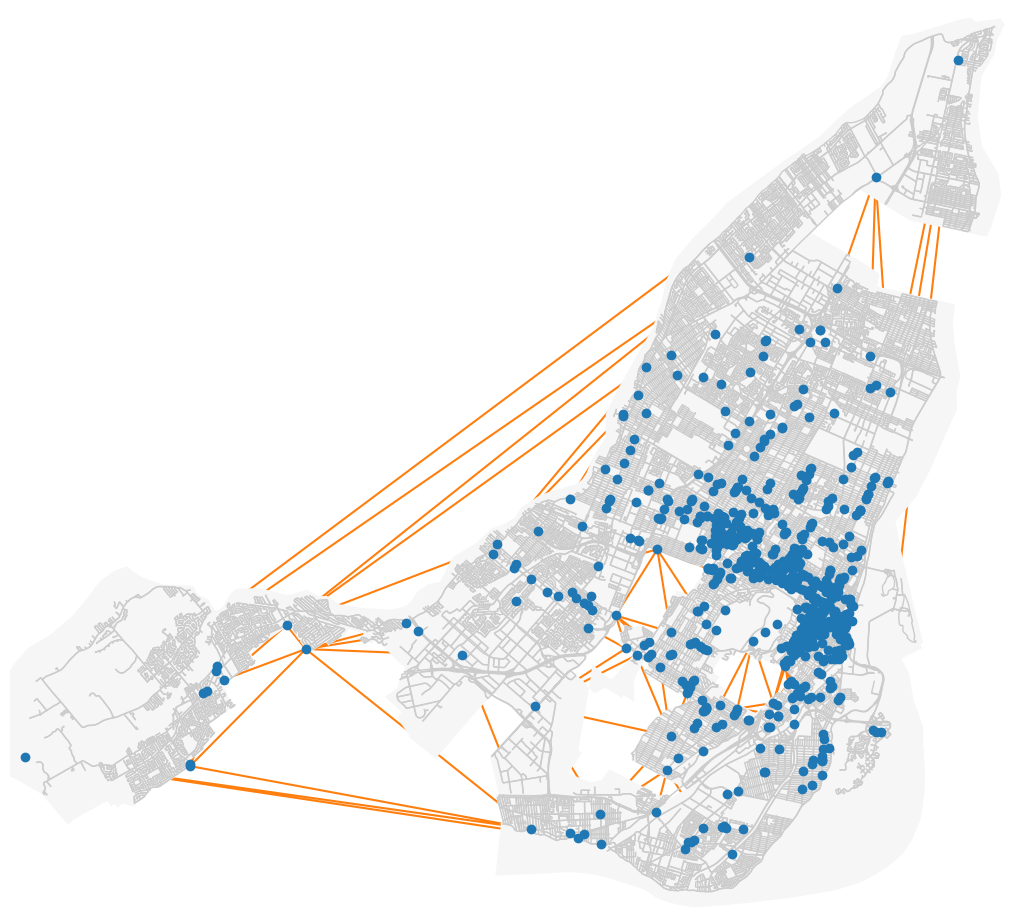

In [47]:
tri = Delaunay(cafes_coords)
fig = plt.figure(figsize=(12, 9))
axes = fig.add_axes([0, 0, 1, 1])
delaunay_plot_2d(tri, ax=axes);

# Plot city border - try to plot neighbourhoods
city_proj.plot(fc="#F6F6F6", ec="none", ax=axes);
ox.plot_graph(G_proj, node_size=0, bgcolor="w", ax=axes, edge_color="#CCCCCC");

In [59]:
G_proj.crs

AttributeError: 'MultiDiGraph' object has no attribute 'crs'

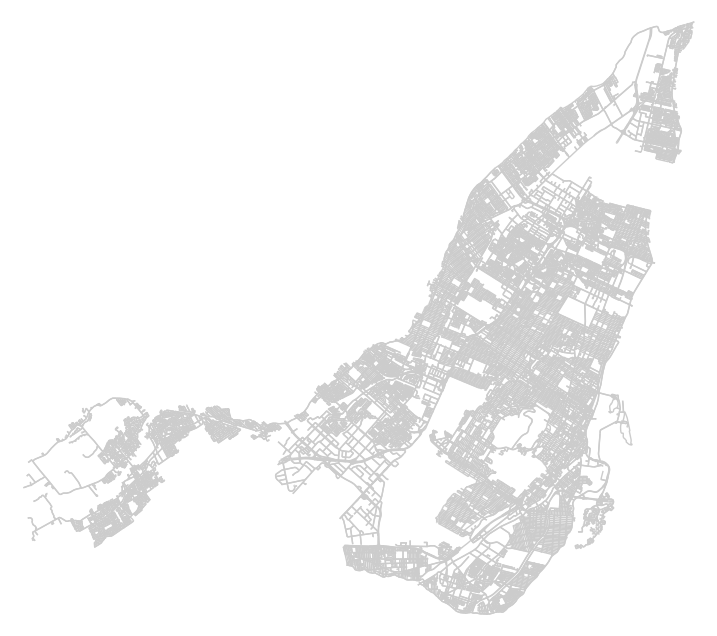

<Figure size 640x480 with 0 Axes>

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the drive network
ox.plot_graph(drive_graph, node_size=0, bgcolor="w", ax=ax, edge_color="#CCCCCC");
# Plot the neighborhood map
df.plot(ax=ax, edgecolor='black', facecolor='none')
# Plot the points of interest
ax.scatter(cafes_coords[:, 0], cafes_coords[:, 1], color='red', s=10, label='Points of Interest')
# Set title and legend
ax.set_title('Drive Network, Neighborhood Map, and Points of Interest')
ax.legend()

# Show plot
plt.show()